In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

/home/adeel/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from shapely.geometry import LineString, Point

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.reset_defaults()

plt.style.use("default")
# plt.style.use("dark_background")

In [4]:
df_py = pd.read_csv('../out/paraguay/paraguay.csv')
df_gt = pd.read_csv('../out/guatemala/guatemala.csv')

In [5]:
df = df_gt
# df = df_py

In [6]:
mask = df.route_length.notnull()
route_lengths = df[mask].route_length.to_numpy()
wb_lengths = df[mask].processed_length.to_numpy()

In [8]:
diffs = wb_lengths - route_lengths
abs_diffs = np.abs(diffs)
rel_errs = abs_diffs / wb_lengths

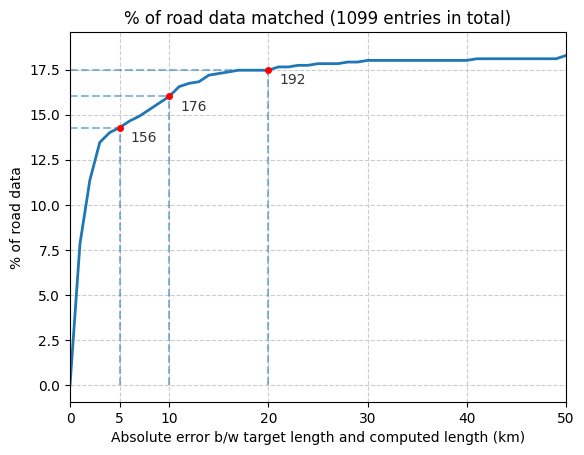

In [9]:
fig = plt.figure()
N = 1099
sorted_diffs = np.arange(100)
frac = np.array([(abs_diffs < d).sum() for d in sorted_diffs]) / N
pct = 100 * frac
x, y = sorted_diffs, pct
plt.plot(x, y, linewidth=2)

for d in [5, 10, 20]:
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString([(d, 0), (d, 100)])
    intersection = first_line.intersection(second_line)

    if intersection.geom_type == 'MultiPoint':
        intersection_x, intersection_y = np.array(LineString(intersection).xy)
    elif intersection.geom_type == 'Point':
        intersection_x, intersection_y = np.array(intersection.xy)

    plt.vlines(x=intersection_x, ymin=0, ymax=intersection_y, linestyle='--', alpha=0.5)
    plt.hlines(y=intersection_y, xmin=0, xmax=intersection_x, linestyle='--', alpha=0.5)
    plt.scatter(intersection_x, intersection_y, s=16, c='red', zorder=10)
#     plt.annotate(f'{int(intersection_y*N//100)} ({float(intersection_y):.2f} %)', 
    plt.annotate(f'{int(intersection_y*N//100)}', 
                 (intersection_x, intersection_y), 
                 (8, -10), 
                 textcoords='offset points',
                 alpha=0.8)

plt.xlim((0, 50))

# plt.yticks(np.arange(0, 1.1, .1))
locs, _ = plt.xticks()
locs = np.array(locs, dtype=int).tolist() + [i for i in [5, 10, 20] if i not in locs]
plt.xticks(locs, locs)

plt.ylabel('% of road data')
plt.xlabel('Absolute error b/w target length and computed length (km)')
plt.title(f'% of road data matched ({N} entries in total)')
plt.grid(color='#ccc', linestyle='--')
plt.show()

fig.savefig('img/gt/geo/diff-cdf.png', bbox_inches='tight', pad_inches=0.2)

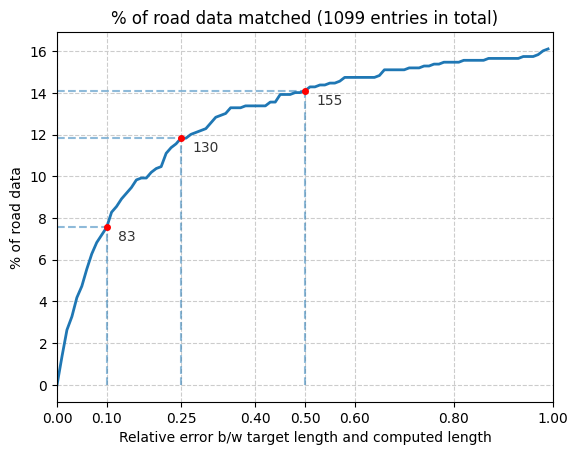

In [10]:
fig = plt.figure()
N = 1099
sorted_errs = np.arange(100) / 100
frac = np.array([(rel_errs < d).sum() for d in sorted_errs]) / N
pct = 100 * frac
x, y = sorted_errs, pct
plt.plot(x, y, linewidth=2)

for d in [.1, .25, .5]:
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString([(d, 0), (d, 100)])
    intersection = first_line.intersection(second_line)

    if intersection.geom_type == 'MultiPoint':
        intersection_x, intersection_y = np.array(LineString(intersection).xy)
    elif intersection.geom_type == 'Point':
        intersection_x, intersection_y = np.array(intersection.xy)

    plt.vlines(x=intersection_x, ymin=0, ymax=intersection_y, linestyle='--', alpha=0.5)
    plt.hlines(y=intersection_y, xmin=0, xmax=intersection_x, linestyle='--', alpha=0.5)
    plt.scatter(intersection_x, intersection_y, s=16, c='red', zorder=10)
    plt.annotate(f'{int(intersection_y*N//100)}', 
                 (intersection_x, intersection_y), 
                 (8, -10), 
                 textcoords='offset points',
                 alpha=0.8)

plt.xlim((0, 1))

# plt.yticks(np.arange(0, 1.1, .1))
locs, _ = plt.xticks()
locs = list(locs) + [i for i in [.1, .25, .5] if i not in locs]
locs.remove(.2)
plt.xticks(locs)

plt.ylabel('% of road data')
plt.xlabel('Relative error b/w target length and computed length')
plt.title(f'% of road data matched ({N} entries in total)')
plt.grid(color='#ccc', linestyle='--')
plt.show()

fig.savefig('img/gt/geo/err-cdf.png', bbox_inches='tight', pad_inches=0.2)

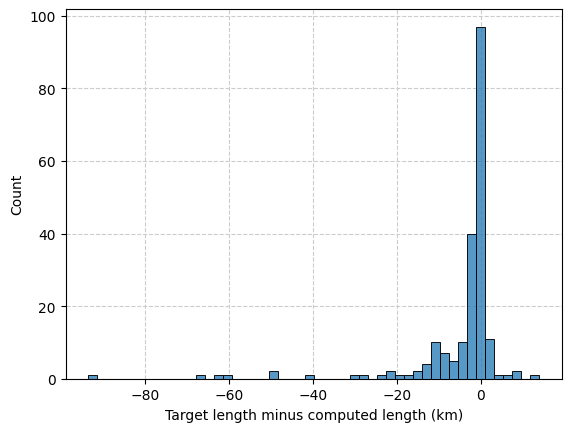

In [11]:
fig = plt.figure()
sns.histplot(diffs, bins=50, zorder=10)
plt.xlabel('Target length minus computed length (km)')
plt.ylabel('Count')
plt.grid(color='#ccc', linestyle='--')
plt.show()
fig.savefig('img/gt/geo/diff-hist.png', bbox_inches='tight', pad_inches=0.2)

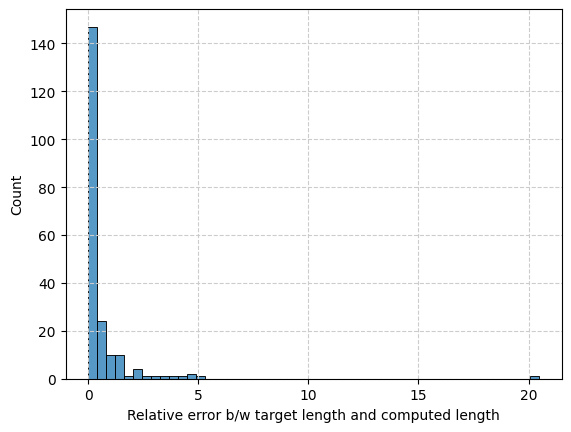

In [12]:
fig = plt.figure()
sns.histplot(rel_errs[rel_errs < np.inf], bins=50)
plt.xlabel('Relative error b/w target length and computed length')
plt.ylabel('Count')
plt.grid(color='#ccc', linestyle='--')
plt.show()
fig.savefig('img/gt/geo/err-hist.png', bbox_inches='tight', pad_inches=0.2)

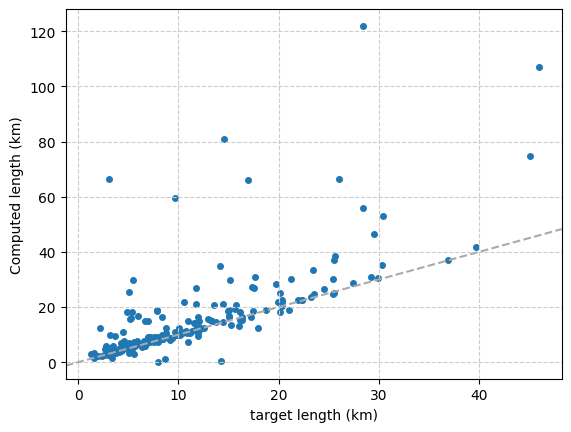

In [16]:
fig = plt.figure()
plt.grid(color='#ccc', linestyle='--')
ax = plt.gca()
ax.axline((1, 1), slope=1, alpha=1, color='#aaa', linestyle='--')
# sns.scatterplot(x=[m['wb_length'] for m in matches], y=[m['length'] for m in matches], s=16)
plt.scatter(x=wb_lengths, y=route_lengths, s=16)
plt.xlabel('target length (km)')
plt.ylabel('Computed length (km)')
plt.show()
fig.savefig('img/gt/geo/length-scatter.png', bbox_inches='tight', pad_inches=0.2)

# Paraguay

In [17]:
df = df_py

In [18]:
mask = df.route_length.notnull()
route_lengths = df[mask].route_length.to_numpy()
wb_lengths = df[mask].processed_length.to_numpy()

In [19]:
diffs = wb_lengths - route_lengths
abs_diffs = np.abs(diffs)
rel_errs = abs_diffs / wb_lengths

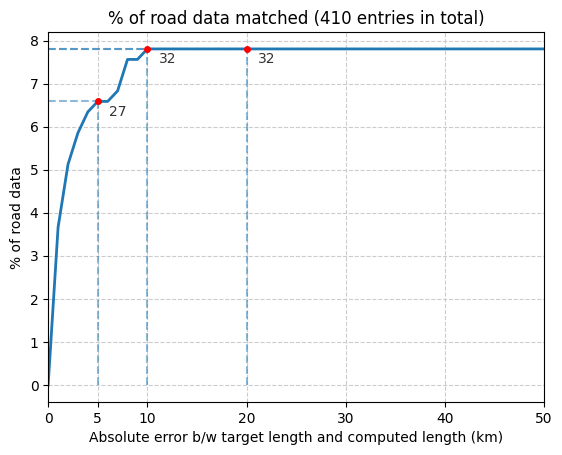

In [20]:
fig = plt.figure()
N = 410
sorted_diffs = np.arange(100)
frac = np.array([(abs_diffs < d).sum() for d in sorted_diffs]) / N
pct = 100 * frac
x, y = sorted_diffs, pct
plt.plot(x, y, linewidth=2)

for d in [5, 10, 20]:
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString([(d, 0), (d, 100)])
    intersection = first_line.intersection(second_line)

    if intersection.geom_type == 'MultiPoint':
        intersection_x, intersection_y = np.array(LineString(intersection).xy)
    elif intersection.geom_type == 'Point':
        intersection_x, intersection_y = np.array(intersection.xy)

    plt.vlines(x=intersection_x, ymin=0, ymax=intersection_y, linestyle='--', alpha=0.5)
    plt.hlines(y=intersection_y, xmin=0, xmax=intersection_x, linestyle='--', alpha=0.5)
    plt.scatter(intersection_x, intersection_y, s=16, c='red', zorder=10)
#     plt.annotate(f'{int(intersection_y*N//100)} ({float(intersection_y):.2f} %)', 
    plt.annotate(f'{int(intersection_y*N//100)}', 
                 (intersection_x, intersection_y), 
                 (8, -10), 
                 textcoords='offset points',
                 alpha=0.8)

plt.xlim((0, 50))

# plt.yticks(np.arange(0, 1.1, .1))
locs, _ = plt.xticks()
locs = np.array(locs, dtype=int).tolist() + [i for i in [5, 10, 20] if i not in locs]
plt.xticks(locs, locs)

plt.ylabel('% of road data')
plt.xlabel('Absolute error b/w target length and computed length (km)')
plt.title(f'% of road data matched ({N} entries in total)')
plt.grid(color='#ccc', linestyle='--')
plt.show()

fig.savefig('img/py/geo/diff-cdf.png', bbox_inches='tight', pad_inches=0.2)

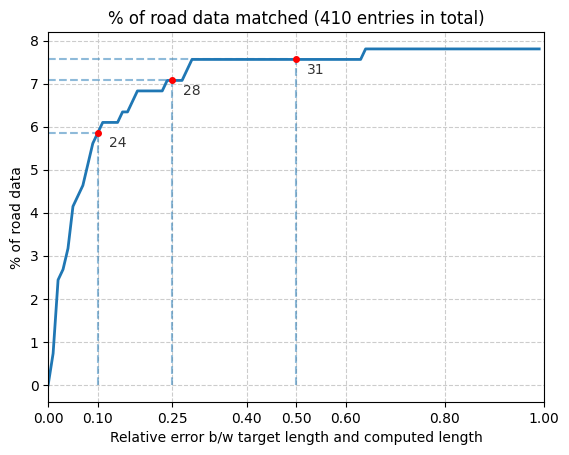

In [21]:
fig = plt.figure()
N = 410
sorted_errs = np.arange(100) / 100
frac = np.array([(rel_errs < d).sum() for d in sorted_errs]) / N
pct = 100 * frac
x, y = sorted_errs, pct
plt.plot(x, y, linewidth=2)

for d in [.1, .25, .5]:
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString([(d, 0), (d, 100)])
    intersection = first_line.intersection(second_line)

    if intersection.geom_type == 'MultiPoint':
        intersection_x, intersection_y = np.array(LineString(intersection).xy)
    elif intersection.geom_type == 'Point':
        intersection_x, intersection_y = np.array(intersection.xy)

    plt.vlines(x=intersection_x, ymin=0, ymax=intersection_y, linestyle='--', alpha=0.5)
    plt.hlines(y=intersection_y, xmin=0, xmax=intersection_x, linestyle='--', alpha=0.5)
    plt.scatter(intersection_x, intersection_y, s=16, c='red', zorder=10)
    plt.annotate(f'{int(intersection_y*N//100)}', 
                 (intersection_x, intersection_y), 
                 (8, -10), 
                 textcoords='offset points',
                 alpha=0.8)

plt.xlim((0, 1))

# plt.yticks(np.arange(0, 1.1, .1))
locs, _ = plt.xticks()
locs = list(locs) + [i for i in [.1, .25, .5] if i not in locs]
locs.remove(.2)
plt.xticks(locs)

plt.ylabel('% of road data')
plt.xlabel('Relative error b/w target length and computed length')
plt.title(f'% of road data matched ({N} entries in total)')
plt.grid(color='#ccc', linestyle='--')
plt.show()

fig.savefig('img/py/geo/err-cdf.png', bbox_inches='tight', pad_inches=0.2)

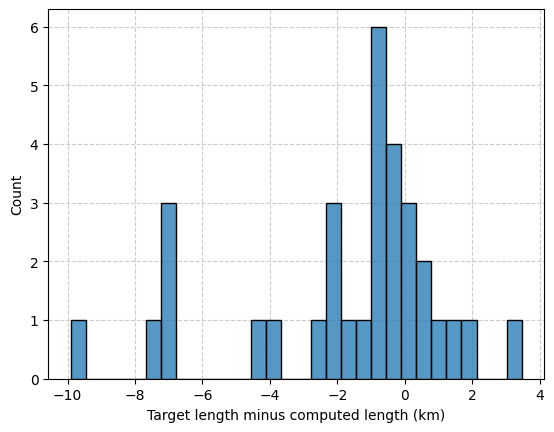

In [25]:
fig = plt.figure()
sns.histplot(diffs, bins=30, zorder=10)
plt.xlabel('Target length minus computed length (km)')
plt.ylabel('Count')
plt.grid(color='#ccc', linestyle='--')
plt.show()
fig.savefig('img/py/geo/diff-hist.png', bbox_inches='tight', pad_inches=0.2)

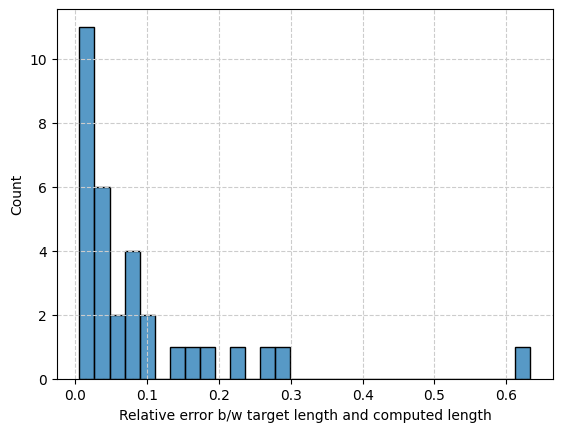

In [26]:
fig = plt.figure()
sns.histplot(rel_errs[rel_errs < np.inf], bins=30)
plt.xlabel('Relative error b/w target length and computed length')
plt.ylabel('Count')
plt.grid(color='#ccc', linestyle='--')
plt.show()
fig.savefig('img/py/geo/err-hist.png', bbox_inches='tight', pad_inches=0.2)

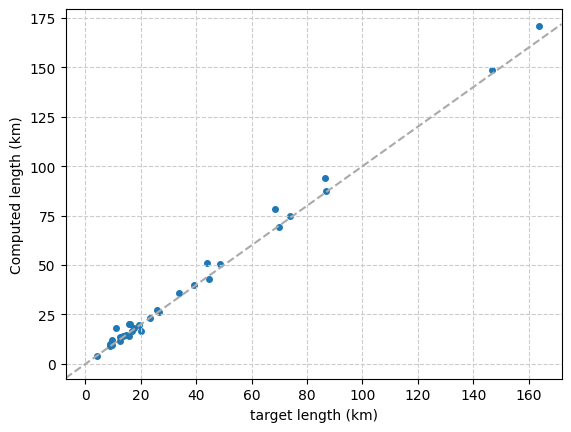

In [27]:
fig = plt.figure()
plt.grid(color='#ccc', linestyle='--')
ax = plt.gca()
ax.axline((1, 1), slope=1, alpha=1, color='#aaa', linestyle='--')
# sns.scatterplot(x=[m['wb_length'] for m in matches], y=[m['length'] for m in matches], s=16)
plt.scatter(x=wb_lengths, y=route_lengths, s=16)
plt.xlabel('target length (km)')
plt.ylabel('Computed length (km)')
plt.show()
fig.savefig('img/py/geo/length-scatter.png', bbox_inches='tight', pad_inches=0.2)